In [ ]:
import pandas as pd

feature_data = pd.read_csv("/content/features_interpolated.csv")
migration_data = pd.read_csv("/content/OECD_acquisition_data_interpolated.csv")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Merge the two datasets based on country and year
merged_data = pd.merge(feature_data, migration_data, left_on=["Country", "Year"], right_on=["COU", "Year"])

# Select desired columns for features and labels
feature_columns = ["Carbon Emissions", "Education Expenditure", "Foreign Direct Investment (FDI) Inflows",
                   "GDP", "Health Expenditure", "Inflation Rate", "Internet Penetration", "Life Expectancy",
                   "Renewable Energy Production", "Unemployment Rate"]
label_column = "Value"

features = merged_data[feature_columns]
labels = merged_data[label_column]

# Concatenate feature columns for the two countries
country_columns = ["Country", "COU"]
features_country1 = features.add_suffix("_country1")
features_country2 = features.add_suffix("_country2")
merged_features = pd.concat([merged_data[country_columns], features_country1, features_country2], axis=1)

# Drop non-numeric columns
merged_features = merged_features.select_dtypes(include=[float, int])

# Normalize the data between 0 and 1
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(merged_features)
normalized_labels = scaler.fit_transform(labels.values.reshape(-1, 1))

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(normalized_features, normalized_labels, test_size=0.3, random_state=42)

# Create the final datasets for training and testing
train_dataset = pd.DataFrame(data=X_train, columns=merged_features.columns)
train_dataset[label_column] = y_train
test_dataset = pd.DataFrame(data=X_test, columns=merged_features.columns)
test_dataset[label_column] = y_test

In [ ]:
train_dataset

,Carbon Emissions_country1,Education Expenditure_country1,Foreign Direct Investment (FDI) Inflows_country1,GDP_country1,Health Expenditure_country1,Inflation Rate_country1,Internet Penetration_country1,Life Expectancy_country1,Renewable Energy Production_country1,Unemployment Rate_country1,...,Education Expenditure_country2,Foreign Direct Investment (FDI) Inflows_country2,GDP_country2,Health Expenditure_country2,Inflation Rate_country2,Internet Penetration_country2,Life Expectancy_country2,Renewable Energy Production_country2,Unemployment Rate_country2,Value
0,0.011762,0.228508,0.312955,0.010644,0.239602,0.159244,0.615434,0.817054,0.193967,0.961808,...,0.228508,0.312955,0.010644,0.239602,0.159244,0.615434,0.817054,0.193967,0.961808,0.000039
1,0.054761,0.438798,0.344126,0.121049,0.480864,0.277177,0.798518,0.903480,0.165420,0.296181,...,0.438798,0.344126,0.121049,0.480864,0.277177,0.798518,0.903480,0.165420,0.296181,0.000177
2,0.059578,0.337309,0.320491,0.017377,0.225076,0.446934,0.504047,0.689895,0.093742,0.192128,...,0.337309,0.320491,0.017377,0.225076,0.446934,0.504047,0.689895,0.093742,0.192128,0.001221
3,0.011479,0.461167,0.315767,0.008869,0.335519,0.358549,0.361075,0.613033,0.307654,0.085737,...,0.461167,0.315767,0.008869,0.335519,0.358549,0.361075,0.613033,0.307654,0.085737,0.000552
4,0.005779,0.749089,0.328185,0.025223,0.482421,0.250270,0.947133,0.887540,0.648591,0.252533,...,0.749089,0.328185,0.025223,0.482421,0.250270,0.947133,0.887540,0.648591,0.252533,0.006123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10314,0.010546,0.628911,0.321904,0.011298,0.326651,0.284815,0.866145,0.707074,0.406133,0.256430,...,0.628911,0.321904,0.011298,0.326651,0.284815,0.866145,0.707074,0.406133,0.256430,0.000043
10315,0.002337,0.469247,0.310452,0.001807,0.296935,0.355904,0.669854,0.725492,0.241461,0.273967,...,0.469247,0.310452,0.001807,0.296935,0.355904,0.669854,0.725492,0.241461,0.273967,0.000000
10316,0.007438,0.587555,0.300486,0.012527,0.319891,0.279769,0.887320,0.842379,0.540015,0.216290,...,0.587555,0.300486,0.012527,0.319891,0.279769,0.887320,0.842379,0.540015,0.216290,0.000026
10317,0.010993,0.443998,0.315324,0.018783,0.400233,0.350283,0.793515,0.784467,0.417976,0.119252,...,0.443998,0.315324,0.018783,0.400233,0.350283,0.793515,0.784467,0.417976,0.119252,0.000086


In [ ]:
test_dataset

,Carbon Emissions_country1,Education Expenditure_country1,Foreign Direct Investment (FDI) Inflows_country1,GDP_country1,Health Expenditure_country1,Inflation Rate_country1,Internet Penetration_country1,Life Expectancy_country1,Renewable Energy Production_country1,Unemployment Rate_country1,...,Education Expenditure_country2,Foreign Direct Investment (FDI) Inflows_country2,GDP_country2,Health Expenditure_country2,Inflation Rate_country2,Internet Penetration_country2,Life Expectancy_country2,Renewable Energy Production_country2,Unemployment Rate_country2,Value
0,0.001627,0.339266,0.317108,0.002381,0.124029,0.396369,0.816808,0.755600,0.038768,0.126656,...,0.339266,0.317108,0.002381,0.124029,0.396369,0.816808,0.755600,0.038768,0.126656,0.000000
1,0.005870,0.335313,0.401931,0.011754,0.354727,0.234434,0.830166,0.814397,0.095986,0.391660,...,0.335313,0.401931,0.011754,0.354727,0.234434,0.830166,0.814397,0.095986,0.391660,0.000099
2,0.000074,0.801088,0.311497,0.000447,0.252018,0.307396,0.985890,0.895687,0.953378,0.084567,...,0.801088,0.311497,0.000447,0.252018,0.307396,0.985890,0.895687,0.953378,0.084567,0.000000
3,0.090528,0.356003,0.333430,0.035217,0.306791,0.338851,0.598318,0.682386,0.260783,0.227981,...,0.356003,0.333430,0.035217,0.306791,0.338851,0.598318,0.682386,0.260783,0.227981,0.000509
4,0.027214,0.440863,0.622469,0.041983,0.402629,0.343009,0.914107,0.803948,0.047868,0.123539,...,0.440863,0.622469,0.041983,0.402629,0.343009,0.914107,0.803948,0.047868,0.123539,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4418,0.000130,0.708340,0.316878,0.000641,0.271772,0.479349,0.905425,0.822013,0.831090,0.017147,...,0.708340,0.316878,0.000641,0.271772,0.479349,0.905425,0.822013,0.831090,0.017147,0.000009
4419,0.000083,0.752673,0.310480,0.000243,0.301117,0.829018,0.930835,0.843619,0.920469,0.210834,...,0.752673,0.310480,0.000243,0.301117,0.829018,0.930835,0.843619,0.920469,0.210834,0.000009
4420,0.010704,0.540852,0.318027,0.006197,0.221246,0.304285,0.607176,0.579915,0.357392,0.335542,...,0.540852,0.318027,0.006197,0.221246,0.304285,0.607176,0.579915,0.357392,0.335542,0.000026
4421,0.012271,0.262626,0.313188,0.010806,0.277645,0.178911,0.580033,0.809793,0.196460,1.000000,...,0.262626,0.313188,0.010806,0.277645,0.178911,0.580033,0.809793,0.196460,1.000000,0.000013


# XGBoost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the XGBoost model
model = xgb.XGBRegressor(
    objective="reg:squarederror",
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00041633616181727026


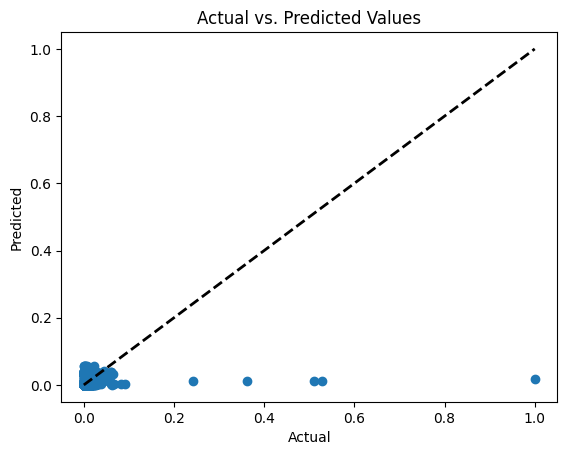

Mean Squared Error: 0.00041633616181727026


In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the actual vs. predicted values for the test data
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Randomforest

<ipython-input-28-258d0723c6d7>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train_log)


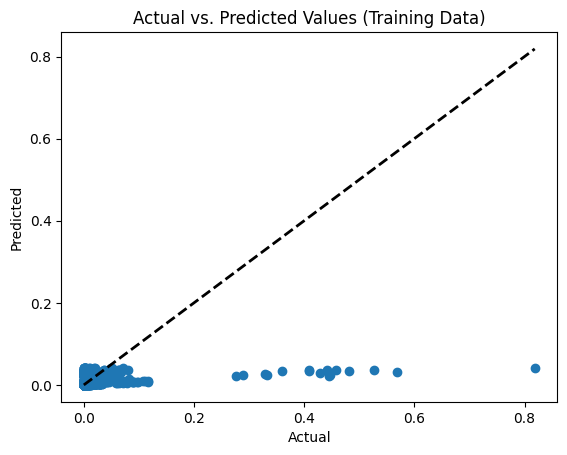

Mean Squared Error (Training Data): 0.00031930224736441485


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Logarithmic transformation of the target variable
y_train_log = np.log1p(y_train)

# Define the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train_log)

# Make predictions on the training data
y_train_pred_log = model.predict(X_train)

# Inverse transform the predictions
y_train_pred = np.expm1(y_train_pred_log)

# Plot the actual vs. predicted values for the training data
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values (Training Data)')
plt.show()

# Calculate the mean squared error on the training data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (Training Data):", mse_train)


# Convert to buckets

In [ ]:
# Merge the two datasets based on country and year
merged_data = pd.merge(feature_data, migration_data, left_on=["Country", "Year"], right_on=["COU", "Year"])

# Select desired columns for features and labels
feature_columns = ["Carbon Emissions", "Education Expenditure", "Foreign Direct Investment (FDI) Inflows",
                   "GDP", "Health Expenditure", "Inflation Rate", "Internet Penetration", "Life Expectancy",
                   "Renewable Energy Production", "Unemployment Rate"]
label_column = "Value"

features = merged_data[feature_columns]
labels = merged_data[label_column]

# Concatenate feature columns for the two countries
country_columns = ["Country", "COU"]
features_country1 = features.add_suffix("_country1")
features_country2 = features.add_suffix("_country2")
merged_features = pd.concat([merged_data[country_columns], features_country1, features_country2], axis=1)

# Drop non-numeric columns
merged_features = merged_features.select_dtypes(include=[float, int])

# Normalize the data between 0 and 1
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(merged_features)

# Define the bins for classification
bins = [-float('inf'), 0.33, 0.67, float('inf')]

# Perform binning to split the values into classes
class_labels = pd.cut(labels, bins=bins, labels=False, include_lowest=True)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(normalized_features, class_labels, test_size=0.3, random_state=42)

# XGBoost Classifier

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Train the XGBoost classifier
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
classification_metrics = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_metrics)

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.45      0.55       668
           1       0.00      0.00      0.00         9
           2       0.91      0.97      0.94      3746

    accuracy                           0.89      4423
   macro avg       0.54      0.47      0.50      4423
weighted avg       0.88      0.89      0.88      4423



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train the Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
classification_metrics = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_metrics)

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.45      0.55       668
           1       0.00      0.00      0.00         9
           2       0.91      0.97      0.94      3746

    accuracy                           0.89      4423
   macro avg       0.54      0.47      0.50      4423
weighted avg       0.87      0.89      0.88      4423



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
